# Exploring the structure of an Experiment

In [1]:
import sys, os 
import numpy as np
from matplotlib import pyplot as plt
from local_utils import get_experiment_group_kl_dict, get_experiment_group_kl_dict_vmp, get_experiment_group_dict


### Load all relevant files linked to an experiment (in this case VMP), with a n_doc_list 

In [2]:
experiment_number = 18
n_doc_list = [100]
nr = 0
experiment_group1 = get_experiment_group_dict(experiment_number, n_doc_list, path_to_experiment=r"experiments_saved/0101_priors/experiment_vmp_")


In [3]:
experiment_group1.keys()

dict_keys([100])

These are all the keys - we will now explain what each one is and how to use it.

In [4]:
np.array(list(experiment_group1[n_doc_list[nr]].keys())).reshape(-1,1)

array([['topic_word_ndarray_list_vmp'],
       ['doc_topic_array_list_vmp'],
       ['kl_list_list_vmp'],
       ['texts_list'],
       ['corpus_list'],
       ['dictlist'],
       ['kl_words_in_topics'],
       ['kl_words_in_topics_actual_list'],
       ['kl_list_list'],
       ['dirichelt_list_list'],
       ['topics_per_doc'],
       ['number_of_docs'],
       ['total_topics'],
       ['words_per_doc'],
       ['total_vocab'],
       ['weightingfactor'],
       ['tag'],
       ['dont_remake'],
       ['laplace'],
       ['emdw'],
       ['iterations'],
       ['default_betas_word_topic'],
       ['default_alphas_topic_doc'],
       ['epochs_emdw'],
       ['full'],
       ['vmp_type'],
       ['vmp_epocs'],
       ['default_betas_word_topic_vmp'],
       ['default_alphas_topic_doc_vmp']], dtype='<U30')

The first bunch of these guys come from where simlda is run (where docs are generated) and albu is run:

Second bunch are ALBU results:

Third bunch is inputs to VMP/ Gensim:

Fourth bunch are results from VMP/Gensim:

## VMP Results

#### topic_word_ndarray_list_vmp:
This guy is used ALOT. It is a list (one per iteration of the full LDA run) of 2d np arrays. Each Dimetion is for the topic and the other dimension is for each Word. Lets start at the middle (one normalized Dirichelt).


This is as sample from one Dirichlet (for one topic-word distribution:



In [5]:
experiment_group1[n_doc_list[nr]]['topic_word_ndarray_list_vmp'][0][0][0:10]

array([8.89838454e+01, 6.99844126e+01, 4.09794227e+01, 4.09885716e+01,
       2.07640021e+01, 1.93259674e+01, 7.84827464e+00, 6.98306152e-03,
       1.58672939e-02, 1.91157404e-02])

Its length is:


In [6]:
 len(experiment_group1[n_doc_list[nr]]['topic_word_ndarray_list_vmp'][0][0]) 

106

because there are also some extra words added (stop word type things)

This is how many Dirichelts there are becuase this is how many topics there are:
Note that one topic is the extra funny stop-word / common word topic


In [7]:
len(experiment_group1[n_doc_list[nr]]['topic_word_ndarray_list_vmp'][0])

7

One layer up, lets see how many iterations were run in this experiment:


In [8]:
len(experiment_group1[n_doc_list[nr]]['topic_word_ndarray_list_vmp'])

1

#### doc_topic_array_list:
This is the document-topic analog of topic_word_ndarray_list.

Here is one of the normalized Dirichelts (for a single document).

In [9]:
experiment_group1[n_doc_list[nr]]['doc_topic_array_list_vmp'][0][0]

array([64.46088259,  1.63772142,  6.61625183, 29.21748745,  0.51219631,
        0.54133398,  0.51412642])

By getting the length of the list we will see how many documents there are:

In [10]:
len(experiment_group1[n_doc_list[nr]]['doc_topic_array_list_vmp'][0])

100

#### kl_list_list:
This contains KLD information for topic-word distributions (original vs actual). This is actually computed on the fly (making everything a lot slower BUT allowing us to show convergence plots).

One per iteration and this is how many iterations there were:

In [11]:
len(experiment_group1[n_doc_list[nr]]['kl_list_list_vmp'])

1

One per epoch and this is how many epochs there were:

In [12]:
len(experiment_group1[n_doc_list[nr]]['kl_list_list_vmp'][0])

100

This is the average KLD over all topics for the first and then last epoch of one of the iterations: 

In [13]:
print("First epoch: ", experiment_group1[n_doc_list[nr]]['kl_list_list_vmp'][0][0], "vs last epoch: ", experiment_group1[n_doc_list[nr]]['kl_list_list_vmp'][0][-1])

First epoch:  1.9028219727160114 vs last epoch:  0.0729458681342521


We can now plot these guys nicely where each line shows a converence plot for one epoch.

Text(0.02, 0.35, 'Average KLD')

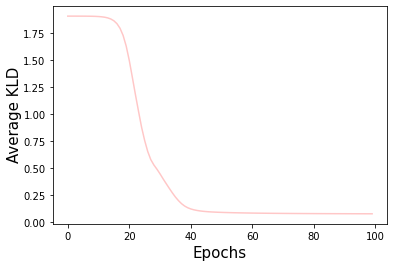

In [14]:
plt.figure()
for i in range(1):
    plt.plot(range(len(experiment_group1[n_doc_list[nr]]["kl_list_list_vmp"][i])), experiment_group1[n_doc_list[nr]]["kl_list_list_vmp"][i], 'r', alpha=0.22)
plt.figtext(0.45, 0.01, r'Epochs', fontdict={'fontsize': 15})
plt.figtext(0.02, 0.35, r'Average KLD', fontdict={'fontsize': 15}, rotation=90)
# plt.show()


## ALBU results

Here we will follow the same process as for topic_word_ndarray_list (VMP / Gensim):

In [15]:
len(experiment_group1[n_doc_list[nr]]['kl_words_in_topics_actual_list'][0])

7

In [16]:
len(experiment_group1[n_doc_list[nr]]['kl_words_in_topics_actual_list'][0][0])

105

In [25]:
experiment_group1[n_doc_list[nr]]['kl_words_in_topics_actual_list'][0][0][0:10]

[0.242236,
 0.196849,
 0.2052,
 0.175545,
 0.235928,
 0.323982,
 0.230186,
 0.145531,
 0.12162,
 0.167877]

kl_words_in_topics is the ground truth Dirichelts from the topics and documents have been generated. We use this guy when plotting the topics and also when calculating KLD. It works the same as kl_words_in_topics_actual_list but isnt a list since there is only one set of ground truth distributions for all the documents.

In [18]:
experiment_group1[n_doc_list[nr]]['kl_words_in_topics'][0][0:10]

[0.0,
 0.0,
 0.0,
 0.000737613,
 0.00151538,
 0.00293898,
 0.00538095,
 0.00930046,
 0.0151752,
 0.0233749]

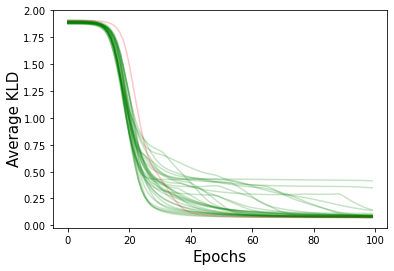

In [19]:

for i in range(30):
    plt.plot(range(len(experiment_group1[n_doc_list[nr]]["kl_list_list"][i])), experiment_group1[n_doc_list[nr]]["kl_list_list"][i], 'g', alpha=0.22)
for i in range(1):
    plt.plot(range(len(experiment_group1[n_doc_list[nr]]["kl_list_list_vmp"][i])), experiment_group1[n_doc_list[nr]]["kl_list_list_vmp"][i], 'r', alpha=0.22)
plt.figtext(0.45, 0.01, r'Epochs', fontdict={'fontsize': 15})
plt.figtext(0.02, 0.35, r'Average KLD', fontdict={'fontsize': 15}, rotation=90)
plt.show()


Lets check the priors:

In [20]:
print("ALBU:", experiment_group1[n_doc_list[nr]]["default_betas_word_topic"])
print("VMP:", experiment_group1[n_doc_list[nr]]["default_betas_word_topic_vmp"])

ALBU: 0.1
VMP: 0.1


In [24]:
experiment_group1[n_doc_list[nr]]["dirichelt_list_list"][0][0][0][0:10]

[12.8113,
 10.1014,
 5.95571,
 5.9587,
 3.5285,
 2.95705,
 2.81378,
 2.67107,
 4.38412,
 5.38553]